In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
import numpy as np

In [42]:
np.random.seed(123)

In [43]:
data_00 = pd.read_csv('./data/centerpointcsv0.csv')
data_01 = pd.read_csv('./data/centerpointcsv1.csv')

In [44]:
data_00.insert(data_00.shape[1], 'type', 0)
data_01.insert(data_01.shape[1], 'type', 1)

In [45]:
data_00.sample(5)

,x,y,type
133,-6.45,-1.74,0
134,10.10,4.60,0
130,-15.55,-3.49,0
163,-7.23,1.84,0
173,13.20,1.36,0


In [46]:
data_01.sample(5)

,x,y,type
11,7.23,-1.08,1
116,7.79,0.76,1
127,12.00,0.95,1
31,10.49,-0.96,1
98,10.89,-1.54,1


In [47]:
df_2 = pd.concat([data_00, data_01])
df_2.shape

(345, 3)

In [49]:
df_2.info

<bound method DataFrame.info of          x     y  type
0   -14.89  5.57     0
1   -26.57  6.04     0
2    -0.79 -0.49     0
3     5.75 -2.21     0
4    -1.21  2.17     0
..     ...   ...   ...
163  -5.29  1.77     1
164  -1.31 -2.96     1
165 -14.99  1.59     1
166 -18.50  3.99     1
167   5.72 -0.57     1

[345 rows x 3 columns]>

In [54]:
df_X = df_2.loc[: ,['x', 'y']]
df_y = df_2.type

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, random_state=123)

In [65]:
X_train

,x,y
71,1.74,1.53
51,-1.35,-0.74
26,6.43,1.09
0,-14.89,5.57
74,4.29,1.36
...,...,...
83,5.36,-8.52
17,12.40,-4.51
53,-8.27,-3.16
98,14.27,-4.23


In [66]:
y_train

71     0
51     1
26     1
0      0
74     0
      ..
83     0
17     0
53     1
98     0
145    1
Name: type, Length: 258, dtype: int64

In [36]:
X = pd.DataFrame(data_00, columns=['x'])
Y = pd.DataFrame(data_00, columns=['y'])
X_1 = pd.DataFrame(data_01, columns=['x'])
Y_1 = pd.DataFrame(data_01, columns=['y'])

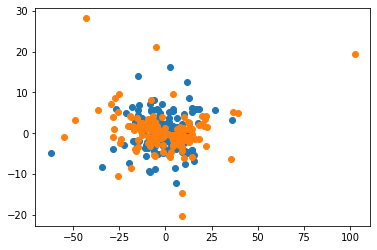

In [37]:
plt.scatter(X,Y)
plt.scatter(X_1,Y_1)
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [59]:
log_reg.score(X_train, y_train)

0.5503875968992248

In [60]:
log_reg.score(X_test, y_test)

0.42528735632183906

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
  return Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),
    ('std_scaler', StandardScaler()),
    ('log_reg', LogisticRegression())
  ])

In [86]:
poly_log_reg = PolynomialLogisticRegression(degree=3)

In [87]:
poly_log_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [90]:
poly_log_reg.score(X_train, y_train)

0.5813953488372093

In [91]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [93]:
plot_decision_boundary(poly_log_reg, axis=[-10,10,-10,10])
plt.scatter(X,Y)
plt.scatter(X_1,Y_1)
plt.show()

In [76]:
print(X_train.shape)
print(y_train.shape)

(258, 2)
(258,)
